### Principle of denoising

Main idea of denosing is using *total variation minimization*$^{[1]}$ method. The *total variation* of a (grayscale) image $I$ is defined as the sum of the gradient norm. In a discrete setting,  the total variation becomes

$$J(I) = \sum_{x} \left | \bigtriangledown I \right |·······(1)$$

where the sum is taken over all images coordinates $x = [x, y].$

In the *Chambolle*'s paper$^{[1]}$, the goal is to find a de-noised image $U$ that minimizes

$$min_{U}\left \| I-U \right \|^{2} + 2\lambda J(U)·······(2)$$

where the norm $\left\|I-U \right \|$ measures the difference between $U$ and the original image $I$.

In [1], the solution of (2) is described as following:
![](./123.png)

And the computation of *div* is described in [2]:

![](./23.png)

And then:

![](./345.png)

### Source Code

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import filters

def denoise(im, U_init, tv_weight, tolerance=0.01, tau=0.125):
    
    """ 
    An implementation of the Rudin-Osher-Fatemi (ROF) denoising model 
    using the numerical procedure presented in eq (11) A. Chambolle (2005).
    
    Input: 
        - im: noisy input image (grayscale), 
        - U_init: initial guess for U, 
        - tv_weight: weight of the TV-regularizing term, 
        - tolerance: tolerance for stop criterion,
        - tau: steplength.
    
    Output: 
        denoised and detextured image, texture residual. 
    """
    im = np.asarray(im)
    m, n = im.shape # size of noisy image
    
    # initialize
    U = U_init
    Px = im # x-component to the dual field
    Py = im # y-conponent of the dual field
    error = 1
    
    while (error > tolerance):
        
        Uold = U
        
        # grandient of primal variable
        GradUx = np.roll(U, -1, axis=1) - U # x-component of U's gradient
        GradUy = np.roll(U, -1, axis=0) - U # y-component of U's gradient
        
        # update the dual varible
        PxNew = Px + (tau/tv_weight)*GradUx
        PyNew = Py + (tau/tv_weight)*GradUy
        NormNew = np.maximum(1, np.sqrt(PxNew**2 + PyNew**2))
        Px = PxNew / NormNew # update of x-component (dual)
        Py = PyNew / NormNew # update of y-component (dual)
        
        # update the primal variable 
        RxPx = np.roll(Px, 1, axis=1) # right x-translation of x-component
        RyPy = np.roll(Py, 1, axis=0) # right y-translation of y-component
        
        DivP = (Px-RxPx) + (Py - RyPy) # divergence of the dual field
        U = im + tv_weight*DivP # update of the primal variable
        
        # update of error-measure
        error = np.linalg.norm(U - Uold) / np.sqrt(n*m)
        
    return U, im-U # denoised image and texture residual

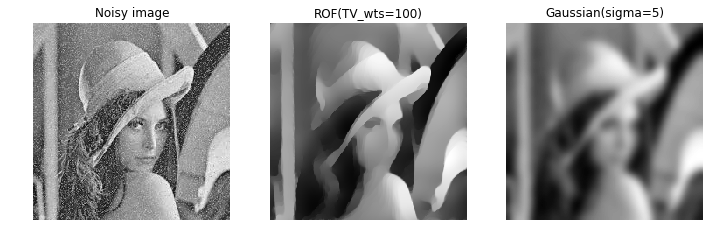

In [2]:
img = cv2.imread("D:/CAO_project/lena-noise.jpg", 0)
G = filters.gaussian_filter(img, 5)
U, T = denoise(img, img, 100)
plt.figure(figsize=(12, 12))
plt.subplot(1, 3, 1), plt.imshow(img, cmap="gray")
plt.title("Noisy image")
plt.axis("off")
plt.subplot(1, 3, 2), plt.imshow(U, cmap="gray")
plt.title("ROF(TV_wts=100)")
plt.axis("off")
plt.subplot(1, 3, 3), plt.imshow(G, cmap="gray")
plt.title("Gaussian(sigma=5)")
plt.axis("off")
plt.show()

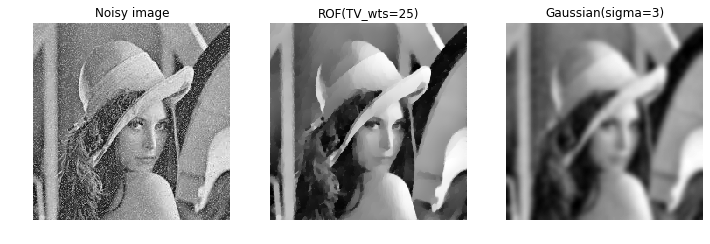

In [3]:
img = cv2.imread("D:/CAO_project/lena-noise.jpg", 0)
G = filters.gaussian_filter(img, 3)
U, T = denoise(img, img, 25)
plt.figure(figsize=(12, 12))
plt.subplot(1, 3, 1), plt.imshow(img, cmap="gray")
plt.title("Noisy image")
plt.axis("off")
plt.subplot(1, 3, 2), plt.imshow(U, cmap="gray")
plt.title("ROF(TV_wts=25)")
plt.axis("off")
plt.subplot(1, 3, 3), plt.imshow(G, cmap="gray")
plt.title("Gaussian(sigma=3)")
plt.axis("off")
plt.show()

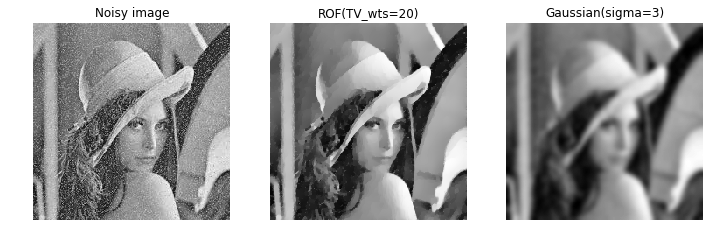

In [4]:
img = cv2.imread("D:/CAO_project/lena-noise.jpg", 0)
G = filters.gaussian_filter(img, 3)
U, T = denoise(img, img, 20)
plt.figure(figsize=(12, 12))
plt.subplot(1, 3, 1), plt.imshow(img, cmap="gray")
plt.title("Noisy image")
plt.axis("off")
plt.subplot(1, 3, 2), plt.imshow(U, cmap="gray")
plt.title("ROF(TV_wts=20)")
plt.axis("off")
plt.subplot(1, 3, 3), plt.imshow(G, cmap="gray")
plt.title("Gaussian(sigma=3)")
plt.axis("off")
plt.show()

### Results Analysis

Looking at the above experimental results, it can be seen that the result of the *ROF* algorithm is better than the Gaussian denoising algorithm. *ROF* not only completes the denoising but also retains some important edge information.

And the value of *tv_weight* between 25 and 30, the results will be better. If the selected *tv_weight* is relatively small, such as 20 or 15, then some noise is not filtered out; the *tv_weight* is larger, such as 50, 80, or 100..etc, then some edge information is also smoothed out.

### Reference

**[1]** Antonin Chambolle. Total variation minimization and a class of binary mrf models. In Energy Minimization Methods in Computer Vision and Pattern Recognition, Lecture Notes in Computer Science, pages 136–152. Springer Berlin / Heidelberg, 2005.

**[2]** Antonon Chambolle. An algorithm for total variation minimization and applications. J. Math. Imaging Vision, 20(1-2):89–97, 2004. Special issue on mathematics and image analysis. 